In [1]:
import gymnasium as gym
import highway_env
import pickle
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

## Agent 1

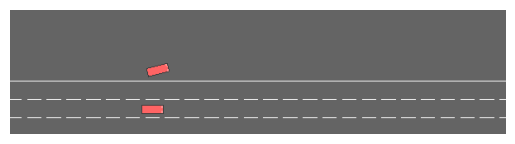

In [2]:
with open("config.pkl", "rb") as f:
    config = pickle.load(f)

env = gym.make("highway-fast-v0", render_mode="rgb_array", config=config)
obs, info = env.reset()

# Run and visualize with random discrete actions
for _ in range(100):
    action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(action)
    img = env.render()
    plt.imshow(img)
    plt.axis("off")
    clear_output(wait=True)
    plt.show()
    time.sleep(0.1)

env.close()

## Agent 2

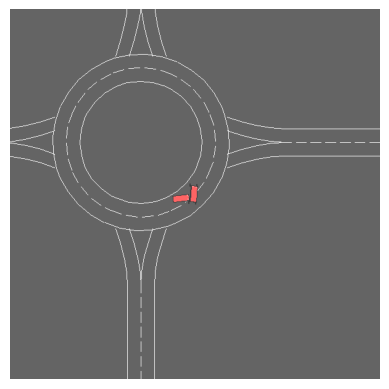

In [4]:
import numpy as np
from highway_env.envs import RoundaboutEnv

# Handles ContinuousAction
class PatchedRoundaboutEnv(RoundaboutEnv):
    def _rewards(self, action):
        if isinstance(action, (int, np.integer)):
            lane_change_reward = action in [0, 2]
        else:
            lane_change_reward = 0.0

        return {
            "collision_reward": self.vehicle.crashed,
            "high_speed_reward": self.vehicle.speed / 30,
            "lane_change_reward": lane_change_reward,
            "on_road_reward": self.vehicle.on_road,
        }

# Register the patched environment
gym.envs.registration.register(
    id="patched-roundabout-v0",
    entry_point=lambda **kwargs: PatchedRoundaboutEnv(**kwargs),
)

with open("roundabout_config.pkl", "rb") as f:
    config = pickle.load(f)

env = gym.make("patched-roundabout-v0", render_mode="rgb_array", config=config)
obs, info = env.reset()

# Visualize a random policy
for _ in range(100):
    action = env.action_space.sample()  # [throttle, steering]
    obs, reward, terminated, truncated, info = env.step(action)
    img = env.render()
    plt.imshow(img)
    plt.axis("off")
    clear_output(wait=True)
    plt.show()
    time.sleep(0.1)

env.close()

## Agent 3

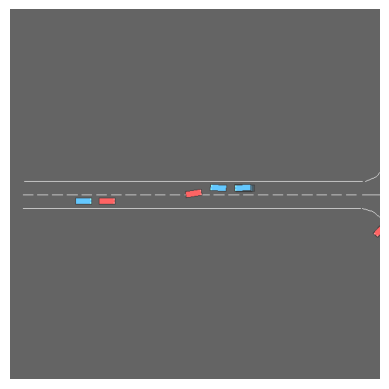

In [3]:
with open("intersection_config.pkl", "rb") as f:
    config = pickle.load(f)

env = gym.make("intersection-v0", render_mode="rgb_array", config=config)
obs, info = env.reset()

for _ in range(100):
    action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(action)
    img = env.render()
    plt.imshow(img)
    plt.axis("off")
    clear_output(wait=True)
    plt.show()
    time.sleep(0.1)

env.close()